In [1]:
# 1. Data Loading: How do you load the COVID-19 datasets for confirmed cases, deaths, and recoveries into Python using Pandas?
import pandas as pd
confirmed_df = pd.read_csv("covid_19_confirmed_v1.csv")
deaths_df    = pd.read_csv("covid_19_deaths_v1.csv")
recovered_df = pd.read_csv("covid_19_recovered_v1.csv")

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [4]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [5]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646


In [17]:
# 2. Data Exploration
# 1. After loading the datasets, what is the structure of each dataset in terms of rows, columns, and data types?
print("========= structure of confirmed_df ==========")
confirmed_df.info()
print("========= structure of deaths_df =============")
deaths_df.info()
print("========= structure of recovered_df ==========")
recovered_df.info()

========= structure of confirmed_df ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB
========= structure of deaths_df =============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(3), int64(493), object(2)
memory usage: 1.0+ MB
========= structure of recovered_df ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(3), int64(493), object(2)
memory usage: 1015.6+ KB


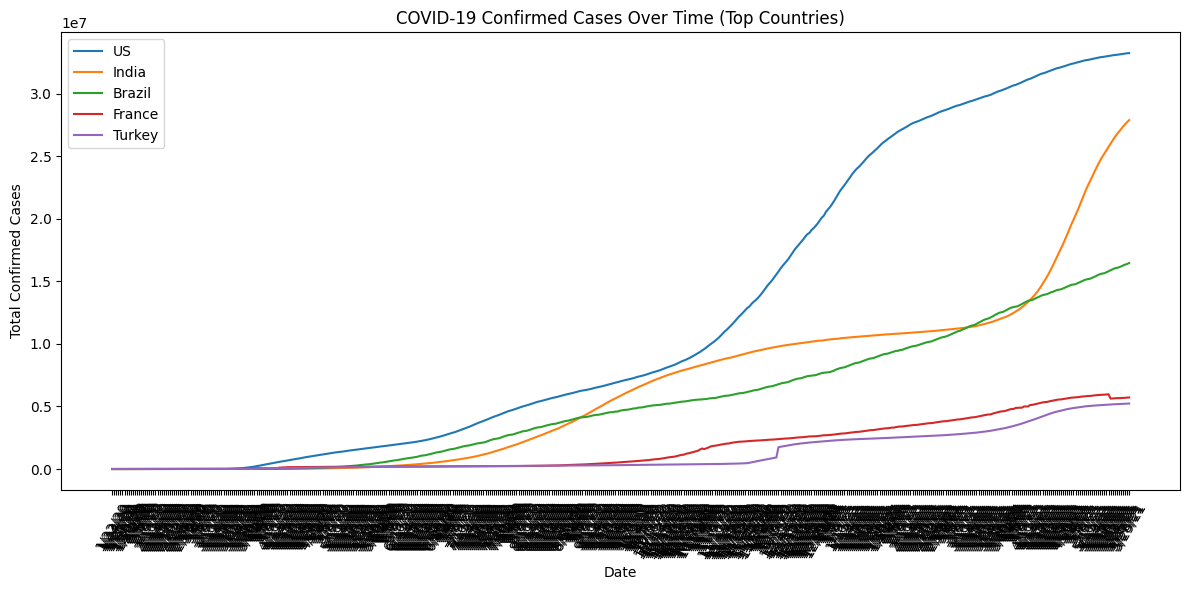

In [19]:
# 2. Generate plots of confirmed cases over time for top countries.

# group by country and sum all provinces
country_confirmed = confirmed_df.groupby("Country/Region").sum(numeric_only=True)

# remove Lat & Long
country_confirmed = country_confirmed.drop(columns=["Lat", "Long"])

top_countries = country_confirmed.iloc[:, -1].sort_values(ascending=False).head(5)
top_countries

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for country in top_countries.index:
    plt.plot(country_confirmed.columns, country_confirmed.loc[country], label=country)

plt.xticks(rotation=60)
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.title("COVID-19 Confirmed Cases Over Time (Top Countries)")
plt.legend()
plt.tight_layout()
plt.show()

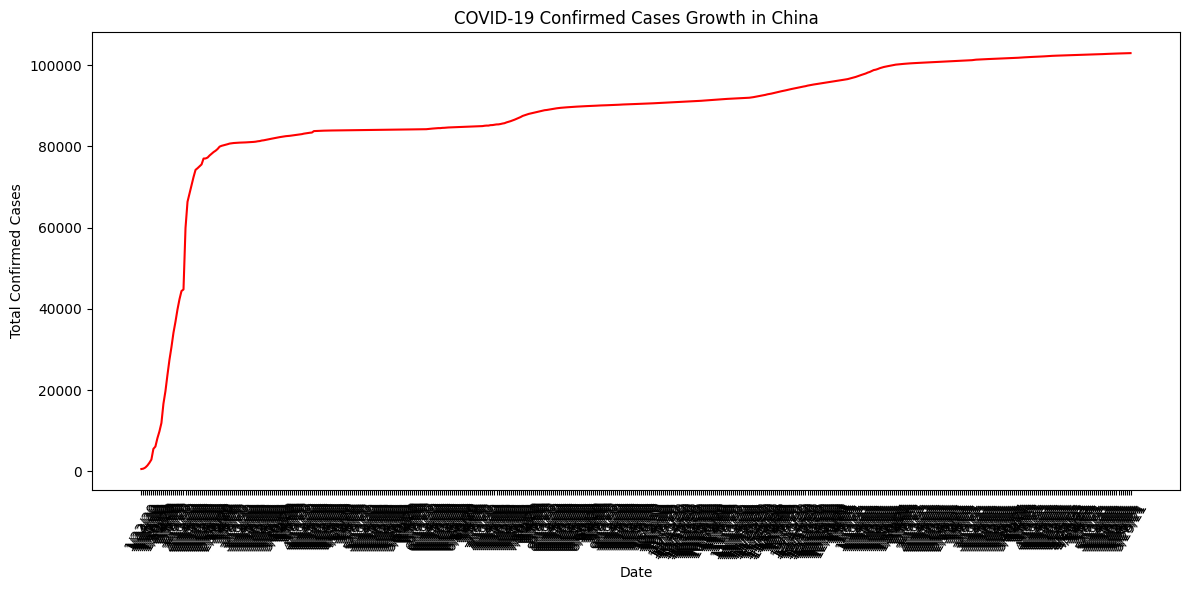

In [20]:
# 3. Generate plots of confirmed cases over time for China.
china_data = country_confirmed.loc["China"]

plt.figure(figsize=(12,6))
plt.plot(country_confirmed.columns, china_data, color="red")

plt.xticks(rotation=60)
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.title("COVID-19 Confirmed Cases Growth in China")
plt.tight_layout()
plt.show()

In [21]:
# 3. Handling Missing Data: Identify these missing values and replace them using a suitable imputation method such as forward filling for time-series data.

# Check missing values
print("Confirmed missing:", confirmed_df.isna().sum().sum())
print("Deaths missing:", deaths_df.isna().sum().sum())
print("Recovered missing:", recovered_df.isna().sum().sum())


Confirmed missing: 194
Deaths missing: 195
Recovered missing: 194


In [22]:
# where they exist in each dataframe
confirmed_df.isna().sum()

Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64

In [23]:
deaths_df.isna().sum()

Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64

In [24]:
recovered_df.isna().sum()

Province/State    191
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64

In [32]:
confirmed_df = confirmed_df.ffill(axis=1)
deaths_df = deaths_df.ffill(axis=1)
recovered_df = recovered_df.ffill(axis=1)

In [33]:
# checking
print("Confirmed missing after:\n", confirmed_df.isna().sum())
print("Deaths missing after:\n", deaths_df.isna().sum())
print("Recovered missing after:\n", recovered_df.isna().sum())

Confirmed missing after:
 Province/State    190
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64
Deaths missing after:
 Province/State    190
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64
Recovered missing after:
 Province/State    191
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64


In [34]:
# 4. Data Cleaning and Preparation: Replace blank values in province column with "All Provinces"
confirmed_df["Province/State"] = confirmed_df["Province/State"].fillna("All Provinces")
deaths_df["Province/State"]    = deaths_df["Province/State"].fillna("All Provinces")
recovered_df["Province/State"] = recovered_df["Province/State"].fillna("All Provinces")

In [36]:
# checking
print("confirmed: ",confirmed_df.isnull().any().any())
print("deaths: ",deaths_df.isnull().any().any())
print("recovered: ",recovered_df.isnull().any().any())

confirmed:  False
deaths:  False
recovered:  False


In [62]:
# 5. Independent Dataset Analysis
# 1. Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, 
#    and when did it occur?
countries = ["Germany","France","Italy"]
daily_new_cases = {}

# Identify date columns (skip first 4 metadata columns)
date_cols = confirmed_df.columns[4:]

# Convert date columns to datetime for safety
date_cols_dt = pd.to_datetime(date_cols)

for country in countries:
    # Filter country rows
    country_data = confirmed_df[confirmed_df["Country/Region"] == country]
    
    # Sum across provinces (if any)
    summed_cumulative = country_data[date_cols].sum(axis=0)
    
    # Convert to numeric just in case
    summed_cumulative = pd.to_numeric(summed_cumulative, errors='coerce')
    
    # Daily new cases: cumulative diff
    daily_cases = summed_cumulative.diff()
    
    # First day should be the cumulative number itself
    daily_cases.iloc[0] = summed_cumulative.iloc[0]
    
    # Fill any remaining NaN with 0
    daily_cases = daily_cases.fillna(0)
    
    # Store with datetime index
    daily_cases.index = date_cols_dt
    
    daily_new_cases[country] = daily_cases

# -----------------------
# Identify peaks
# -----------------------
peaks = {}
for country, data in daily_new_cases.items():
    peak_date = data.idxmax().date()     # datetime.date for readability
    peak_cases = int(data.max())
    peaks[country] = (peak_date, peak_cases)
    print(f"Peak number of daily new cases in {country}: {peak_cases} on {peak_date}")

peaks

Peak number of daily new cases in Germany: 49044 on 2020-12-30
Peak number of daily new cases in France: 117900 on 2021-04-11
Peak number of daily new cases in Italy: 40902 on 2020-11-13


C:\Users\soura\AppData\Local\Temp\ipykernel_15020\3390003193.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_cols_dt = pd.to_datetime(date_cols)


{'Germany': (datetime.date(2020, 12, 30), 49044),
 'France': (datetime.date(2021, 4, 11), 117900),
 'Italy': (datetime.date(2020, 11, 13), 40902)}

In [70]:
# 2. Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. 
#    Which country showed better management of the pandemic according to this metric?

recovery_rates = {}
for country in ["Canada","Australia"] :
  confirmed_cases = confirmed_df[confirmed_df["Country/Region"] == country].iloc[:,4:].sum(axis = 0)
  country_recoveries = recovered_df[recovered_df["Country/Region"] == country].iloc[:,4:].sum(axis = 0)
  recovery_rate = country_recoveries["12/31/20"] / confirmed_cases["12/31/20"]
  recovery_rates[country] = recovery_rate
  print(f"Recovery rate for {country} : {recovery_rate:.2%}")

Recovery rate for Canada : 84.47%
Recovery rate for Australia : 79.38%


In [71]:
# 3. What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and 
#    lowest death rate as of the latest data point.
# 1️⃣ Filter Canada data
canada_confirmed = confirmed_df[confirmed_df["Country/Region"] == "Canada"]
canada_deaths    = deaths_df[deaths_df["Country/Region"] == "Canada"]

# 2️⃣ Identify the latest date column
latest_date = confirmed_df.columns[-1]  # last column of dataset

# 3️⃣ Calculate death rate for each province
death_rates = {}
for i, row in canada_confirmed.iterrows():
    province = row["Province/State"]
    confirmed_cases = row[latest_date]
    deaths = canada_deaths.loc[i, latest_date]
    
    # Avoid division by zero
    if confirmed_cases > 0:
        rate = deaths / confirmed_cases
    else:
        rate = 0
    death_rates[province] = rate

# 4️⃣ Display results
print("Death rates by province in Canada:")
for province, rate in death_rates.items():
    print(f"{province}: {rate:.2%}")

# 5️⃣ Find highest and lowest
max_province = max(death_rates, key=death_rates.get)
min_province = min(death_rates, key=death_rates.get)

print(f"\nHighest death rate: {max_province} ({death_rates[max_province]:.2%})")
print(f"Lowest death rate: {min_province} ({death_rates[min_province]:.2%})")


Death rates by province in Canada:
Alberta: 0.98%
British Columbia: 1.18%
Diamond Princess: 0.00%
Grand Princess: 0.00%
Manitoba: 2.07%
New Brunswick: 1.96%
Newfoundland and Labrador: 0.46%
Northwest Territories: 0.00%
Nova Scotia: 1.52%
Nunavut: 0.62%
Ontario: 1.62%
Prince Edward Island: 0.00%
Quebec: 3.01%
Repatriated Travellers: 0.00%
Saskatchewan: 1.16%
Yukon: 2.38%

Highest death rate: Quebec (3.01%)
Lowest death rate: Diamond Princess (0.00%)


In [102]:
# 6. Data Transformation
# 1. Transform the 'deaths' dataset from wide format (where each column represents a date) to long format where each row represents a single date 
#    and columns are now country names, ensuring that the date column is in datetime format. How would this transformation be executed?

# Melt deaths dataset from wide to long format
deaths_long = pd.melt(
    deaths_df,
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="deaths"
)

# Convert Date column to datetime safely (infer format)
deaths_long["Date"] = pd.to_datetime(deaths_long["Date"], dayfirst=False, errors="coerce")

# Check for any rows where conversion failed
invalid_dates = deaths_long[deaths_long["Date"].isna()]
if not invalid_dates.empty:
    print("Warning: Some dates could not be converted to datetime!")
    print(invalid_dates.head())

# Verify
deaths_long.head()


C:\Users\soura\AppData\Local\Temp\ipykernel_15020\2382480721.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_long["Date"] = pd.to_datetime(deaths_long["Date"], dayfirst=False, errors="coerce")


,Province/State,Country/Region,Lat,Long,Date,deaths
0,All Provinces,Afghanistan,33.93911,67.709953,2020-01-22,0.0
1,All Provinces,Albania,41.1533,20.1683,2020-01-22,0.0
2,All Provinces,Algeria,28.0339,1.6596,2020-01-22,0.0
3,All Provinces,Andorra,42.5063,1.5218,2020-01-22,0.0
4,All Provinces,Angola,-11.2027,17.8739,2020-01-22,0.0


In [82]:
# 2. What is the total number of deaths reported per country up to the current date?
# Group by country and sum deaths
total_deaths_country = deaths_long.groupby("Country/Region")["deaths"].sum()

# Display
print("Total deaths per country:")
print(total_deaths_country.sort_values(ascending=False))


Total deaths per country:
Country/Region
US                  123616044.0
Brazil               72624584.0
India                44428093.0
Mexico               43006478.0
United Kingdom       28928802.0
                       ...     
Dominica                    0.0
Micronesia                  0.0
Marshall Islands            0.0
Holy See                    0.0
Kiribati                    0.0
Name: deaths, Length: 193, dtype: object


In [83]:
# 3. What are the top 5 countries with the highest average daily deaths?
# Compute daily deaths per country
# First, pivot to wide format: rows = Date, columns = Country, values = deaths
daily_deaths_country = deaths_long.pivot_table(
    index="Date",
    columns="Country/Region",
    values="deaths",
    aggfunc="sum"
)

# Compute daily new deaths
daily_new_deaths = daily_deaths_country.diff().fillna(0)

# Compute average daily deaths per country
avg_daily_deaths = daily_new_deaths.mean()

# Top 5 countries
top5_avg_daily_deaths = avg_daily_deaths.sort_values(ascending=False).head(5)
print("\nTop 5 countries with highest average daily deaths:")
print(top5_avg_daily_deaths)



Top 5 countries with highest average daily deaths:
Country/Region
US                1203.048583
Brazil             933.313765
India              659.862348
Mexico             452.338057
United Kingdom     259.184211
dtype: float64


C:\Users\soura\AppData\Local\Temp\ipykernel_15020\266052775.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  daily_new_deaths = daily_deaths_country.diff().fillna(0)


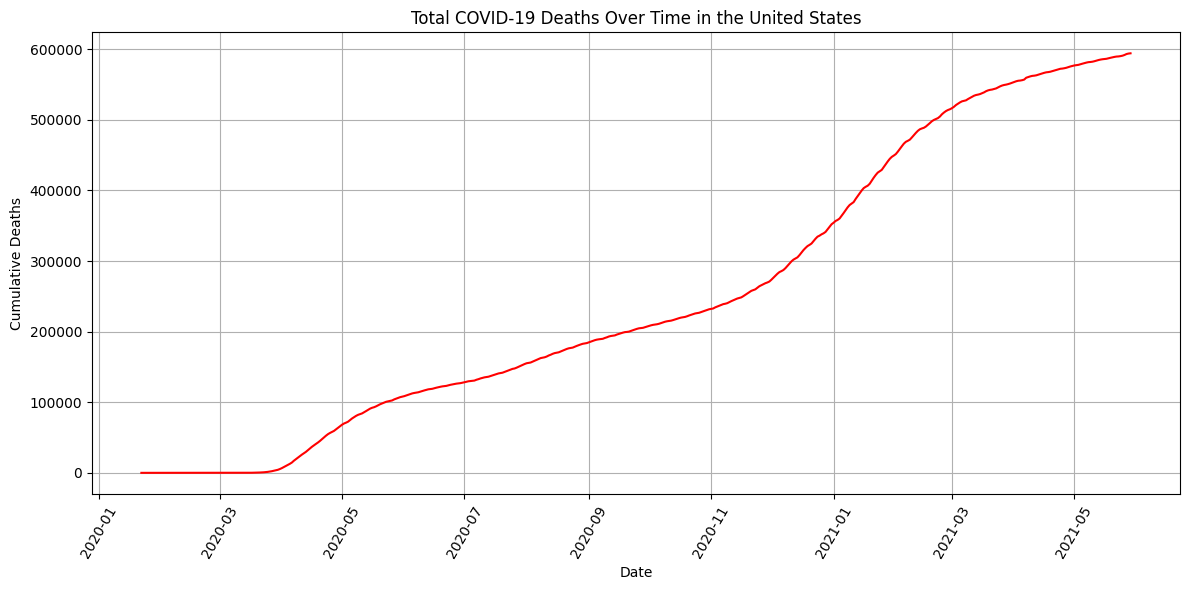

In [85]:
# 4. How have the total deaths evolved over time in the United States?
# Filter US deaths from daily_new_deaths
us_daily_deaths = daily_new_deaths["US"]  # or "United States" depending on dataset

# Compute cumulative deaths over time
us_total_deaths = us_daily_deaths.cumsum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(us_total_deaths.index, us_total_deaths.values, color='red')
plt.title("Total COVID-19 Deaths Over Time in the United States")
plt.xlabel("Date")
plt.ylabel("Cumulative Deaths")
plt.xticks(rotation=60)
plt.grid(True)
plt.tight_layout()
plt.show()

In [103]:
#7. Data Merging
#1. How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' 
#   columns to create a comprehensive view of the pandemic's impact?

confirmed_long = pd.melt(
    confirmed_df,
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="confirmed"
)

# Convert Date column to datetime safely (infer format)
confirmed_long["Date"] = pd.to_datetime(confirmed_long["Date"], dayfirst=False, errors="coerce")

# Check for any rows where conversion failed
invalid_dates = confirmed_long[deaths_long["Date"].isna()]
if not invalid_dates.empty:
    print("Warning: Some dates could not be converted to datetime!")
    print(invalid_dates.head())

C:\Users\soura\AppData\Local\Temp\ipykernel_15020\925567983.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_long["Date"] = pd.to_datetime(confirmed_long["Date"], dayfirst=False, errors="coerce")


In [108]:
recovered_long = pd.melt(
    recovered_df,
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="recovered"
)

# Convert Date column to datetime safely (infer format)
recovered_long["Date"] = pd.to_datetime(recovered_long["Date"], dayfirst=False, errors="coerce")

# Check for any rows where conversion failed
invalid_dates = recovered_long[recovered_long["Date"].isna()]
if not invalid_dates.empty:
    print("Warning: Some dates could not be converted to datetime!")
    print(invalid_dates.head())

C:\Users\soura\AppData\Local\Temp\ipykernel_15020\525735535.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovered_long["Date"] = pd.to_datetime(recovered_long["Date"], dayfirst=False, errors="coerce")


In [110]:
combined_data = confirmed_long.merge(deaths_long,on = ["Country/Region","Date"],suffixes= ("_conf","_deaths"))

In [112]:
pandemic_df = combined_data.merge(recovered_long,on = ["Country/Region","Date"])
pandemic_df.head()

,Province/State_conf,Country/Region,Lat_conf,Long_conf,Date,confirmed,Province/State_deaths,Lat_deaths,Long_deaths,deaths,Province/State,Lat,Long,recovered
0,All Provinces,Afghanistan,33.93911,67.709953,2020-01-22,0,All Provinces,33.93911,67.709953,0.0,All Provinces,33.93911,67.709953,0.0
1,All Provinces,Albania,41.1533,20.1683,2020-01-22,0,All Provinces,41.1533,20.1683,0.0,All Provinces,41.1533,20.1683,0.0
2,All Provinces,Algeria,28.0339,1.6596,2020-01-22,0,All Provinces,28.0339,1.6596,0.0,All Provinces,28.0339,1.6596,0.0
3,All Provinces,Andorra,42.5063,1.5218,2020-01-22,0,All Provinces,42.5063,1.5218,0.0,All Provinces,42.5063,1.5218,0.0
4,All Provinces,Angola,-11.2027,17.8739,2020-01-22,0,All Provinces,-11.2027,17.8739,0.0,All Provinces,-11.2027,17.8739,0.0


In [114]:
# 2. Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]

# Create a Year-Month column for grouping
pandemic_df["YearMonth"] = pandemic_df["Date"].dt.to_period("M")

# Group by Country and YearMonth, then sum confirmed, deaths, recovered
monthly_summary = pandemic_df.groupby(["Country/Region", "YearMonth"])[
    ["confirmed", "deaths", "recovered"]
].sum().reset_index()

# Optional: convert YearMonth back to string for easier display
monthly_summary["YearMonth"] = monthly_summary["YearMonth"].astype(str)

monthly_summary.head(12)  # show first 12 rows


,Country/Region,YearMonth,confirmed,deaths,recovered
3269,Zimbabwe,2020-06,12096,142.0,2113.0
3270,Zimbabwe,2020-07,48113,721.0,13001.0
3271,Zimbabwe,2020-08,163293,4136.0,95065.0
3272,Zimbabwe,2020-09,223571,6617.0,172489.0
3273,Zimbabwe,2020-10,251343,7230.0,225416.0
3274,Zimbabwe,2020-11,268984,7811.0,244771.0
3275,Zimbabwe,2020-12,366341,9807.0,302327.0
3276,Zimbabwe,2021-01,787416,23012.0,531530.0
3277,Zimbabwe,2021-02,984049,38753.0,849842.0
3278,Zimbabwe,2021-03,1132264,46556.0,1056857.0


In [115]:
# 3. Redo the analysis in last question for United States, Italy and Brazil.
countries = ["US", "Italy", "Brazil"]  # adjust "US" or "United States" based on your dataset
monthly_subset = pandemic_df[pandemic_df["Country/Region"].isin(countries)]

monthly_summary_countries = monthly_subset.groupby(
    ["Country/Region", "YearMonth"]
)[["confirmed", "deaths", "recovered"]].sum().reset_index()

In [116]:
monthly_summary_countries

,Country/Region,YearMonth,confirmed,deaths,recovered
0,Brazil,2020-01,0,0.0,0.0
1,Brazil,2020-02,5,0.0,0.0
2,Brazil,2020-03,37127,976.0,290.0
3,Brazil,2020-04,1048506,66571.0,400893.0
4,Brazil,2020-05,7944285,509030.0,3206734.0
5,Brazil,2020-06,28161222,1353392.0,14780735.0
6,Brazil,2020-07,62641865,2370476.0,43861433.0
7,Brazil,2020-08,102903896,3345405.0,82386569.0
8,Brazil,2020-09,132059962,4004352.0,114602710.0
9,Brazil,2020-10,160991539,4732789.0,141354942.0


In [120]:
# 8. Combined Data Analysis
# 1. For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. 
#    What might this indicate about the pandemic's impact in these countries?
import numpy as np

# 1️⃣ Ensure Date is datetime
pandemic_df["Date"] = pd.to_datetime(pandemic_df["Date"], errors="coerce")

# 2️⃣ Filter for 2020
data_2020 = pandemic_df[pandemic_df["Date"].dt.year == 2020].copy()

# 3️⃣ Convert confirmed and deaths to numeric (force errors to NaN)
data_2020["confirmed"] = pd.to_numeric(data_2020["confirmed"], errors="coerce")
data_2020["deaths"]    = pd.to_numeric(data_2020["deaths"], errors="coerce")

# 4️⃣ Aggregate by Country and Date
country_totals_2020 = data_2020.groupby(["Country/Region","Date"])[["confirmed","deaths"]].sum().reset_index()

# 5️⃣ Compute daily death rate safely
country_totals_2020["death_rate"] = country_totals_2020.apply(
    lambda row: row["deaths"]/row["confirmed"] if row["confirmed"] > 0 else np.nan,
    axis=1
)

# 6️⃣ Compute average death rate per country
avg_death_rate_2020 = country_totals_2020.groupby("Country/Region")["death_rate"].mean().sort_values(ascending=False)

# 7️⃣ Top 3 countries
top3_countries = avg_death_rate_2020.head(3)
print("Top 3 countries with highest average death rates in 2020:")
print(top3_countries)


Top 3 countries with highest average death rates in 2020:
Country/Region
Yemen         0.249532
MS Zaandam    0.219036
Sudan         0.103706
Name: death_rate, dtype: float64


In [121]:
# 2. Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. 
#    What can this tell us about the outcomes of COVID-19 cases in the country?
# Ensure numeric columns
pandemic_df["recovered"] = pd.to_numeric(pandemic_df["recovered"], errors="coerce")
pandemic_df["deaths"] = pd.to_numeric(pandemic_df["deaths"], errors="coerce")

# Filter for South Africa
sa_data = pandemic_df[pandemic_df["Country/Region"] == "South Africa"]
total_recoveries = sa_data["recovered"].sum()
total_deaths     = sa_data["deaths"].sum()

print(f"Total recoveries in South Africa: {total_recoveries:,}")
print(f"Total deaths in South Africa: {total_deaths:,}")
recovery_death_ratio = total_recoveries / total_deaths if total_deaths > 0 else np.nan
print(f"Recovery-to-death ratio: {recovery_death_ratio:.2f}")


Total recoveries in South Africa: 310,037,573.0
Total deaths in South Africa: 10,250,036.0
Recovery-to-death ratio: 30.25


In [122]:
#3. Analyze the ratio of recoveries to confirmed cases for the United States on a monthly basis from March 2020 to May 2021. 
#   Which month experienced the highest recovery ratio, and what could be the potential reasons?
# Ensure numeric columns
pandemic_df["confirmed"] = pd.to_numeric(pandemic_df["confirmed"], errors="coerce")
pandemic_df["recovered"] = pd.to_numeric(pandemic_df["recovered"], errors="coerce")

# Filter US data and date range
us_data = pandemic_df[(pandemic_df["Country/Region"] == "US") &
                      (pandemic_df["Date"] >= "2020-03-01") &
                      (pandemic_df["Date"] <= "2021-05-31")].copy()

us_data["YearMonth"] = us_data["Date"].dt.to_period("M")

monthly_us = us_data.groupby("YearMonth")[["confirmed", "recovered"]].sum().reset_index()

monthly_us["recovery_ratio"] = monthly_us.apply(
    lambda row: row["recovered"] / row["confirmed"] if row["confirmed"] > 0 else np.nan,
    axis=1
)

max_month = monthly_us.loc[monthly_us["recovery_ratio"].idxmax()]
print(f"Month with highest recovery ratio: {max_month['YearMonth']}")
print(f"Recovery ratio: {max_month['recovery_ratio']:.2%}")


Month with highest recovery ratio: 2020-10
Recovery ratio: 39.58%
